## Basic Imports and Set-Ups

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import chi2_contingency

In [104]:
slice = pd.read_csv("./Data/slice_level_oh_tags.csv", low_memory=False)
meta_data = pd.read_csv("./Data/concept_tagging_metadata.csv", low_memory=False)

## Tables

In [105]:
slice

,concept_id,advantage_mean,advantage_stdev,advantage_median,believability_mean,believability_stdev,believability_median,distinctiveness_mean,distinctiveness_stdev,distinctiveness_median,...,explicitly claimed health or lifestyle benefits_mapped_clean_High in minerals,cuisines of origin_mapped_clean_Spanish,types of snack does it describe_mapped_clean_Rice-cakes,cuisines of origin_mapped_clean_Greek,cuisines of origin_mapped_clean_Moroccan,preparation or cooking method_mapped_clean_Charred,taste profile_mapped_clean_Tart,taste profile_mapped_clean_Caramelized,preparation or cooking method_mapped_clean_Pressure cooked,preparation or cooking method_mapped_clean_Grilled
0,45561,3.866748,1.012883,4,4.109224,0.959518,4,2.438410,1.293614,2,...,0,0,0,0,0,0,0,0,0,0
1,45562,3.598365,0.993976,4,3.995791,0.855829,4,2.555764,1.257179,3,...,0,0,0,0,0,0,0,0,0,0
2,45563,3.496965,1.045463,3,4.052792,0.896170,4,2.934148,1.298462,3,...,0,0,0,0,0,0,0,0,0,0
3,45564,3.794805,0.866135,4,4.136182,0.847042,4,2.633771,1.247739,3,...,0,0,0,0,0,0,0,0,0,0
4,45565,3.420002,1.048521,3,3.977261,0.938561,4,2.169057,1.168593,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,147533,3.671478,1.004650,4,4.105840,0.890645,4,2.626495,1.333322,2,...,0,0,0,0,0,0,0,0,0,0
713,147534,3.651767,1.071277,4,4.088976,0.915078,4,2.822462,1.208302,3,...,0,0,0,0,0,0,0,0,0,0
714,147535,3.604257,0.979745,4,4.099988,0.846744,4,2.892624,1.234771,3,...,0,0,0,0,0,0,0,0,0,0
715,147536,3.383851,0.967111,3,3.967173,0.844314,4,2.745580,1.261914,3,...,0,0,0,0,0,0,0,0,0,0


In [106]:
meta_data

,slice_id,short_text,full_text
0,45565,"Introducing Mac n’ Cheetos, the cheesy snack t...",Crunchy Mac n’ Cheetos are elbow shaped puffs ...
1,45935,"Introducing Lay’s Potato Nests, beautiful real...",Lay’s Potato Nests are thin and crispy two-bit...
2,46016,"Introducing Tostitos Toppers, the satisfying c...",Each Tostitos Topper is a bite-sized white cor...
3,45570,"Introducing Cheetos Duos, the classic Cheetos ...",Cheetos Duos are Cheetos puffs with two layers...
4,45709,"Introducing Matador Thin Sliced Jerky Chips, a...","Cut extra-thin and baked to crispy perfection,..."
...,...,...,...
712,146028,"A line of artisan, bakery-inspired crackers th...","Golden-baked, crispy whole grain crackers that..."
713,146033,"A line of artisan, bread-inspired crackers tha...","Golden-baked, crispy whole grain crackers with..."
714,147525,"Deliciously crunchy, wholesome cracker sandwic...","Mouthwateringly creamy dip-inspired fillings, ..."
715,147535,Graze away with the delicious taste of SunChip...,"Round, thin miniature whole grain crackers in ..."


## Changing Values of distinctiveness_mean Into %

If I want to change it into %:
Set the max value to 5
max_value = 5
Convert to percentages (0-100)
slice['distinctiveness_mean'] = (slice['distinctiveness_mean'] / 5) * 100

In [107]:
slice

,concept_id,advantage_mean,advantage_stdev,advantage_median,believability_mean,believability_stdev,believability_median,distinctiveness_mean,distinctiveness_stdev,distinctiveness_median,...,explicitly claimed health or lifestyle benefits_mapped_clean_High in minerals,cuisines of origin_mapped_clean_Spanish,types of snack does it describe_mapped_clean_Rice-cakes,cuisines of origin_mapped_clean_Greek,cuisines of origin_mapped_clean_Moroccan,preparation or cooking method_mapped_clean_Charred,taste profile_mapped_clean_Tart,taste profile_mapped_clean_Caramelized,preparation or cooking method_mapped_clean_Pressure cooked,preparation or cooking method_mapped_clean_Grilled
0,45561,3.866748,1.012883,4,4.109224,0.959518,4,2.438410,1.293614,2,...,0,0,0,0,0,0,0,0,0,0
1,45562,3.598365,0.993976,4,3.995791,0.855829,4,2.555764,1.257179,3,...,0,0,0,0,0,0,0,0,0,0
2,45563,3.496965,1.045463,3,4.052792,0.896170,4,2.934148,1.298462,3,...,0,0,0,0,0,0,0,0,0,0
3,45564,3.794805,0.866135,4,4.136182,0.847042,4,2.633771,1.247739,3,...,0,0,0,0,0,0,0,0,0,0
4,45565,3.420002,1.048521,3,3.977261,0.938561,4,2.169057,1.168593,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,147533,3.671478,1.004650,4,4.105840,0.890645,4,2.626495,1.333322,2,...,0,0,0,0,0,0,0,0,0,0
713,147534,3.651767,1.071277,4,4.088976,0.915078,4,2.822462,1.208302,3,...,0,0,0,0,0,0,0,0,0,0
714,147535,3.604257,0.979745,4,4.099988,0.846744,4,2.892624,1.234771,3,...,0,0,0,0,0,0,0,0,0,0
715,147536,3.383851,0.967111,3,3.967173,0.844314,4,2.745580,1.261914,3,...,0,0,0,0,0,0,0,0,0,0


## Creating a Bell Curve of Distinctiveness

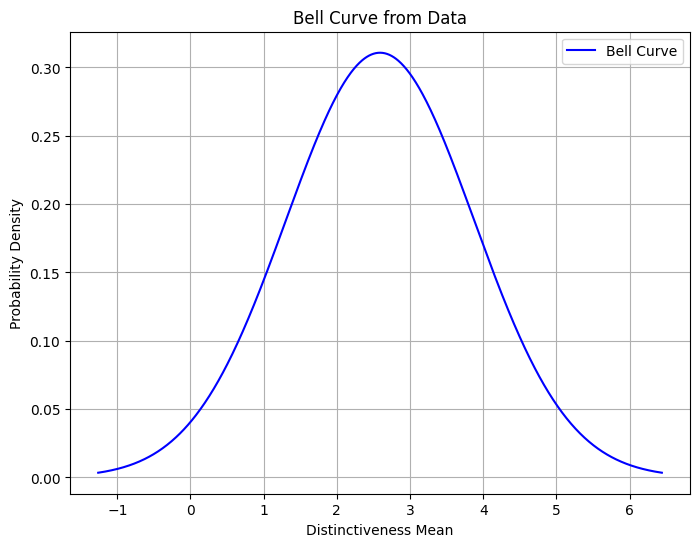

In [108]:
# Extract the entire columns into NumPy arrays
distinctiveness_mean = slice['distinctiveness_mean'].values
distinctiveness_stdev = slice['distinctiveness_stdev'].values
# Estimate parameters (mean and standard deviation)
mean = np.mean(distinctiveness_mean)
std_dev = np.mean(distinctiveness_stdev)
# Generate data points for the bell curve
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)
y = norm.pdf(x, mean, std_dev)
# Plot the bell curve
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Bell Curve', color='blue')
plt.xlabel('Distinctiveness Mean')
plt.ylabel('Probability Density')
plt.title('Bell Curve from Data')
plt.legend()
plt.grid(True)
plt.show()

Bell curve seems nice and neat.

## Summary Analysis

### Advantage Mean

In [109]:
column_name = 'advantage_mean'

# Calculate summary statistics
mean_value_advantage = slice[column_name].mean()
median_value_advantage = slice[column_name].median()
std_dev_advantage = slice[column_name].std()
min_value_advantage = slice[column_name].min()
max_value_advantage = slice[column_name].max()
q1 = slice[column_name].quantile(0.25)
q3 = slice[column_name].quantile(0.75)

# Print the summary statistics
print(f"Column: {column_name}")
print(f"Mean: {mean_value_advantage}")
print(f"Median: {median_value_advantage}")
print(f"Standard Deviation: {std_dev_advantage}")
print(f"Minimum: {min_value_advantage}")
print(f"Maximum: {max_value_advantage}")
print(f"25th Percentile (Q1): {q1}")
print(f"75th Percentile (Q3): {q3}")

Column: advantage_mean
Mean: 3.5221597719483957
Median: 3.534823202
Standard Deviation: 0.18366716337835393
Minimum: 2.735441533
Maximum: 4.119399915
25th Percentile (Q1): 3.405100667
75th Percentile (Q3): 3.646730069


Q1 and Q3 suggest that the middle 50% of the "advantage_mean" scores fall within the range of approximately 3.41 to 3.65.

### Box Plot - Adv Mean

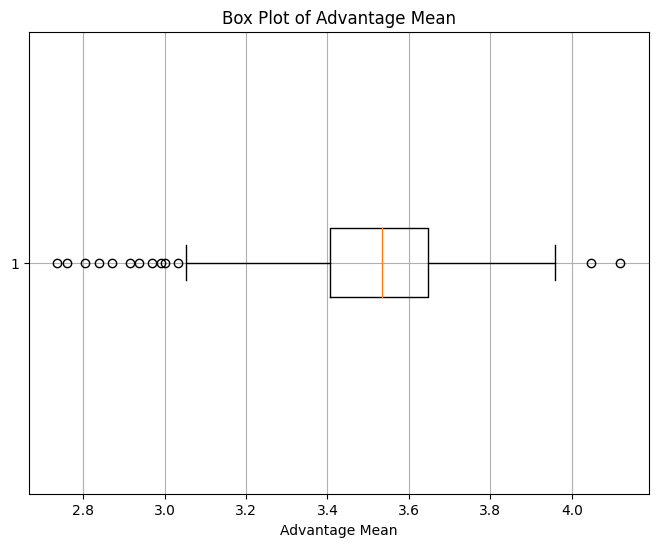

In [110]:
box_advantage_mean = slice['advantage_mean']
# Set the figure size
plt.figure(figsize=(8, 6))  
# Create the box plot horizontally (vert=False)
plt.boxplot(box_advantage_mean, vert=False)  
# Set the x-axis label
plt.xlabel('Advantage Mean')  
# Set the title
plt.title('Box Plot of Advantage Mean')  
plt.grid(True)
plt.show()

## Scatter Plots

Believability vs purchase likelihood

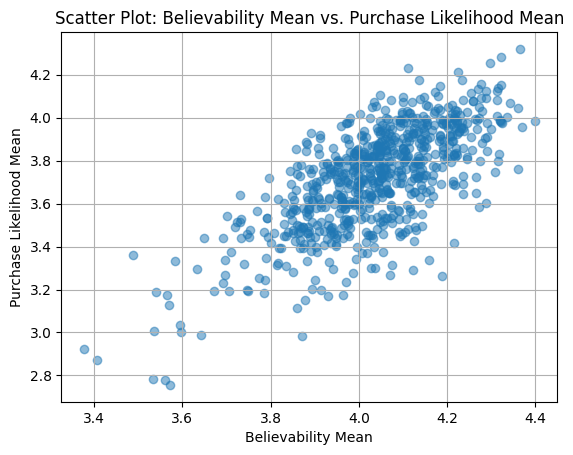

In [111]:
plt.scatter(slice['believability_mean'], slice['purchase_likelihood_mean'], alpha=0.5)
plt.xlabel('Believability Mean')
plt.ylabel('Purchase Likelihood Mean')
plt.title('Scatter Plot: Believability Mean vs. Purchase Likelihood Mean')
plt.grid(True)

Premiumness vs believability

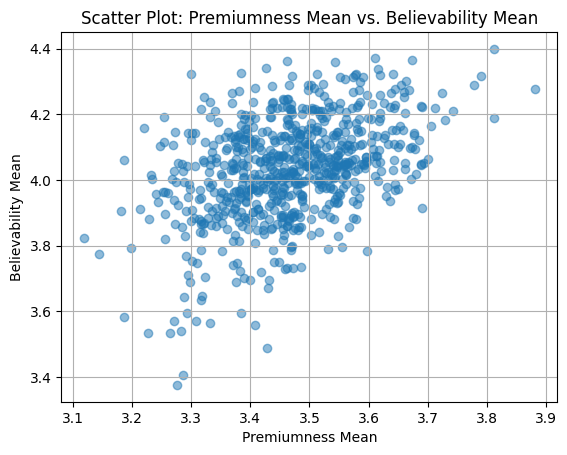

In [112]:
plt.scatter(slice['premiumness_mean'], slice['believability_mean'], alpha=0.5)
plt.xlabel('Premiumness Mean')
plt.ylabel('Believability Mean')
plt.title('Scatter Plot: Premiumness Mean vs. Believability Mean')
plt.grid(True)

The more premium the product looks, the greater the believability there is.

## Chi-Squared Test:

Seeing if presence of "taste profile_mapped_clean_Cheesy" and "purchase_likelihood_mean" have a relationship

In [113]:
cheesy_purchaselikelihood_table = pd.crosstab(slice['taste profile_mapped_clean_Cheesy'], slice['purchase_likelihood_mean'])
# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(cheesy_purchaselikelihood_table)
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Statistic: 717.0000000000001
P-value: 0.48244029430431423
Degrees of Freedom: 716
Expected Frequencies:
[[0.66666667 0.66666667 0.66666667 ... 0.66666667 0.66666667 0.66666667]
 [0.33333333 0.33333333 0.33333333 ... 0.33333333 0.33333333 0.33333333]]


Based on the p-value of 0.4824, there is not enough evidence to conclude that there is a statistically significant association between the presence of a specific word in an ad campaign ("taste profile_mapped_clean_Cheesy") and the likelihood of purchase ("purchase_likelihood_mean").
The high p-value suggests that any observed differences between the groups are likely due to chance, and there is no strong indication that the presence of the word is related to purchase likelihood in a significant way.

## Correlation Matrix of Means

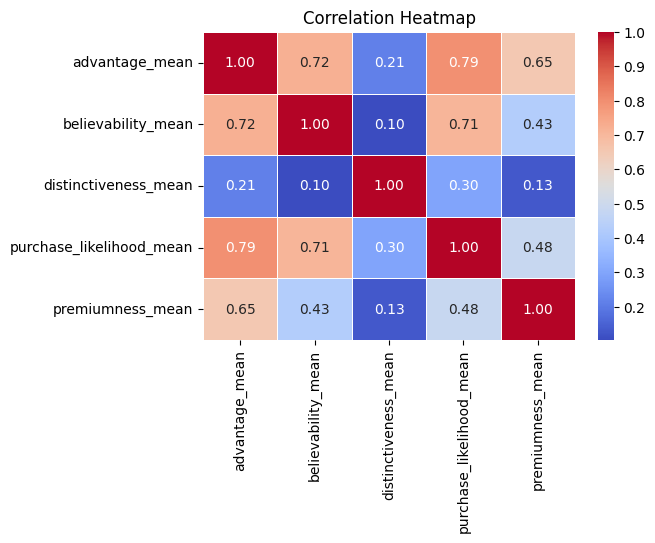

In [122]:
selected_columns = ['advantage_mean', 'believability_mean', 'distinctiveness_mean', 'purchase_likelihood_mean', 'premiumness_mean']
correlation_matrix = slice[selected_columns].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()